In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing

In [2]:
#读取数据
Telecom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
Telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#观察维度类型
Telecom.dtypes

#TotalCharges为对象类型 需转换为浮点数类型
#.astype()
# Telecom['TotalCharges'] = Telecom['TotalCharges'].astype('float')
# ValueError: could not convert string to float: 在此处无法使用.astype转换类型

#.convert_objects(convert_numeric = True)
#convert_objects() dataframe中强制转换数据类型 
#convert_numeric = True 将object转换为数值类型 无法转换的为nan
Telecom['TotalCharges'] = Telecom['TotalCharges'].convert_objects(convert_numeric = True)
# print(Telecom.dtypes)

#转换后的'TotalCharges'有11行为nan
Telecom.isnull().sum()

#删除空值行
Telecom.dropna(inplace=True)

Telecom.head()

/Users/sparkxixi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 客户ID对建模分析不影响并且在EDA分析阶段，已知gender 和 phoneservice对客户流失相关性低
# 于是删除上述三列

TelecomVar = Telecom.iloc[:,2:20] #删除customerID and gender维度
TelecomVar.drop('PhoneService',axis = 1,inplace = True)
TelecomVar.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
# 数值标准化
# 将数值每列转换为 均值为0 方差为1 的高斯分布
# 数值标准化对大部分机器学习算法都是必要的，以线性分类器为例，若维度数值差距过大，会使数值大的维度重要性占比过大
# 在利用梯度下降优化时，若维度数值差距过大，会使优化收敛过慢甚至无法收敛

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
TelecomVar[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(TelecomVar[['tenure','MonthlyCharges','TotalCharges']])
TelecomVar.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,-1.280248,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194
1,0,No,No,0.064303,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740
2,0,No,No,-1.239504,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649
3,0,No,No,0.512486,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248
4,0,No,No,-1.239504,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457


In [6]:
#seaborn.boxplot 箱线图 此处用于分析查看数据是否存在异常值
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.boxplot(data = TelecomVar[['tenure','MonthlyCharges','TotalCharges']],palette="Set3")
plt.title("Check outliers of standardized tenure, MonthlyCharges and TotalCharges")

#由箱线图分析 'tenure','MonthlyCharges','TotalCharges'并无明显的异常值

In [7]:
# 字符型维度的取值
TelecomObject=TelecomVar.select_dtypes(include=['object'])

def colValue(colName):
    print(colName,"--",TelecomVar[colName].unique()) 
    
for col in TelecomObject.columns:
    colValue(col)

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No phone service' 'No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes' 'No internet service']
OnlineBackup -- ['Yes' 'No' 'No internet service']
DeviceProtection -- ['No' 'Yes' 'No internet service']
TechSupport -- ['No' 'Yes' 'No internet service']
StreamingTV -- ['No' 'Yes' 'No internet service']
StreamingMovies -- ['No' 'Yes' 'No internet service']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [8]:
#字符编码
#label编码

from sklearn.preprocessing import LabelEncoder

label_TelecomVar = TelecomVar.copy()

def colEncoder(colName): #对维度编码
    label_TelecomVar[colName] = LabelEncoder().fit_transform(label_TelecomVar[colName])
    
for col in TelecomObject.columns:
    colEncoder(col)
    
label_TelecomVar.head() #label编码后的数据集



,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,-1.280248,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194
1,0,0,0,0.064303,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740
2,0,0,0,-1.239504,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649
3,0,0,0,0.512486,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248
4,0,0,0,-1.239504,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457


In [9]:
# Partner ：是否有配偶 （Yes or No）
# Dependents ：是否经济独立 （Yes or No）
# MultipleLines：是否开通了多线业务（Yes 、No or No phoneservice 三种）
# InternetService：是否开通互联网服务 （No, DSL数字网络，fiber optic光纤网络 三种）
# OnlineSecurity -- ['No' 'Yes' 'No internet service']
# OnlineBackup -- ['Yes' 'No' 'No internet service']
# DeviceProtection -- ['No' 'Yes' 'No internet service']
# TechSupport -- ['No' 'Yes' 'No internet service']
# StreamingTV -- ['No' 'Yes' 'No internet service']
# StreamingMovies -- ['No' 'Yes' 'No internet service']
# Contract：签订合同方式 （按月，一年，两年）
# PaperlessBilling：是否开通电子账单（Yes or No）

#one hot 编码
one_hot_TelecomVar = pd.get_dummies(TelecomVar)

one_hot_TelecomVar

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.064303,-0.260878,-0.173740,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.239504,-0.363923,-0.959649,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.512486,-0.747850,-0.195248,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,0,-0.995040,1.158489,-0.645369,1,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
6,0,-0.424625,0.807802,-0.147313,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
7,0,-0.913552,-1.165018,-0.874169,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
8,0,-0.180161,1.329677,0.336516,0,1,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
9,0,1.205134,-0.287470,0.531476,1,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0


In [10]:
#将y值 yes转换为1 no转化为0
Telecom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Telecom['Churn'].replace(to_replace='No',  value=0, inplace=True)
# Telecom['Churn'].head()

In [11]:
print(label_TelecomVar.shape)
print(Telecom['Churn'].shape)
print(Telecom['Churn'].values)

(7032, 17)
(7032,)
[0 0 1 ... 0 1 0]


In [126]:
# 构建模型

# 由于我们所拥有的数据集是不平衡的，所以最好使用分层交叉验证来确保训练集和测试集都包含每个类样本的保留人数。
# 交叉验证函数StratifiedShuffleSplit，功能是从样本数据中随机按比例选取训练数据（train）和测试数据（test）
# 参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10
# 参数test_size和train_size是用来设置train/test对中train和test所占的比例
# 参数 random_state控制是将样本随机打乱

# from sklearn.model_selection import StratifiedShuffleSplit
# #label编码
# X,y = label_TelecomVar,Telecom['Churn'].values

# sss=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# print("训练数据和测试数据被分成的组数：",sss.get_n_splits(X,y))

# for train_index,test_index in sss.split(X,y):
#     print("train:",train_index)
#     print("test:",test_index)
#     X_train,X_test=X.iloc[train_index], X.iloc[test_index]
#     y_train,y_test=y[train_index], y[test_index]
    
# print(y_train.isnull().sum())
    

In [104]:
# from sklearn.ensemble import RandomForestClassifier       
# from sklearn.svm import SVC, LinearSVC      

# from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Classifiers=[["Random Forest",RandomForestClassifier()],
#              ["Support Vector Machine",SVC()]]

# for name,classifier in Classifiers:
#     classifier=classifier
#     print("train:",train_index)
#     print("test:",test_index)
#     classifier.fit(X_train,y_train)
#     y_pred=classifier.predict(X_test)
#     recall=recall_score(y_test,y_pred)
#     print("召回率:",recall)

train: [4040 1561 6463 ... 2550 6727 4009]
test: [4581 3898 3153 ... 2095 1765 2249]
召回率: 0.44919786096256686
train: [4040 1561 6463 ... 2550 6727 4009]
test: [4581 3898 3153 ... 2095 1765 2249]
召回率: 0.4679144385026738



 base model in label_TelecomVar


0

In [122]:
#交叉验证划分训练集和测试集
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

X = label_TelecomVar
y = Telecom['Churn'].values

random_state = np.random.RandomState(0)

#随机划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

#分层划分
# sss=StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=random_state)
# for train_index,test_index in sss.split(X,y):
#     print("train:",train_index)
#     print("test:",test_index)
#     X_train,X_test=X.iloc[train_index], X.iloc[test_index]
#     y_train,y_test=y[train_index], y[test_index]


print("训练集大小：",X_train.shape,y_train.shape)
print("测试集大小：",X_test.shape,y_test.shape)

# print(y_train.isnull().sum())
# print(y_test.isnull().sum())

# print(y_train[y_train.isnull()])
# print(y_test[y_test.isnull()])

训练集大小： (4922, 17) (4922,)
测试集大小： (2110, 17) (2110,)


准确率: 0.7900473933649289
----------------------
混淆矩阵:
 [[1383  172]
 [ 271  284]]
---------------------
召回率: 0.5117117117117117
----------------------
精确率: 0.6228070175438597
---------------------
F1值: 0.5618199802176064
---------------------


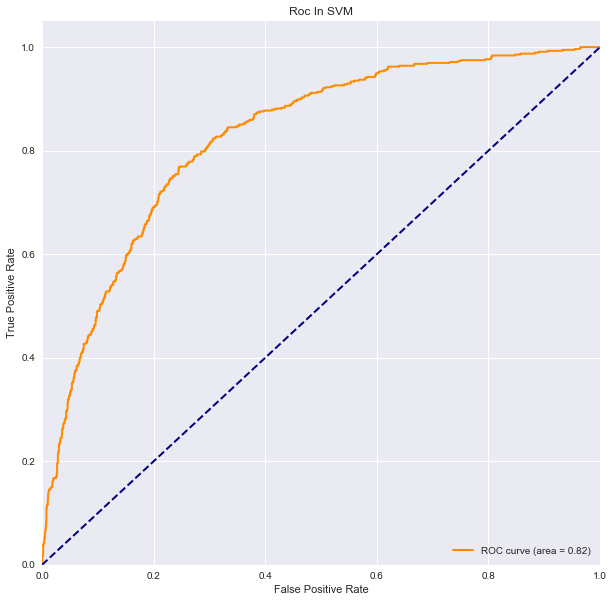

In [123]:
#支持向量机SVM
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import roc_curve,auc,accuracy_score


random_state = np.random.RandomState(0)
Classifiers = SVC(kernel='linear', probability=True,random_state=random_state)

Classifiers.fit(X_train,y_train)

y_pred=Classifiers.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1_value = f1_score(y_test,y_pred)

print("准确率:",accuracy)
print("----------------------")
print("混淆矩阵:\n",confusion_matrix(y_test,y_pred))
print("---------------------")
print("召回率:",recall)
print("----------------------")
print("精确率:",precision)
print("---------------------")
print("F1值:",f1_value)
print("---------------------")

#通过decision_function()方法计算预测结果为正样本的概率
y_score = Classifiers.decision_function(X_test)
#计算不同阈值下的fpr和tpr
fpr,tpr,threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr,tpr)


plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc In SVM')
plt.legend(loc="lower right")
plt.show()


# 分层抽样的结果
# 混淆矩阵:
#  [[1403  146]
#  [ 280  281]]
# ---------------------
# 召回率: 0.5008912655971479
# ----------------------
# 精确率: 0.65807962529274
# ---------------------
# F1值: 0.5688259109311741
# ---------------------

# 随机划分的结果
# 混淆矩阵:
#  [[1383  172]
#  [ 271  284]]
# ---------------------
# 召回率: 0.5117117117117117
# ----------------------
# 精确率: 0.6228070175438597
# ---------------------
# F1值: 0.5618199802176064
# ---------------------



#base model in one_hot_TelecomVar


In [13]:
#交叉验证划分训练集和测试集
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X_one = one_hot_TelecomVar
y_one = Telecom['Churn'].values

random_state = np.random.RandomState(0)

# X_one_train,X_one_test,y_one_train,y_one_test = train_test_split(X_one,y_one,test_size = 0.3,random_state = 0)

#分层交叉验证
# from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

#5-FOLD交叉验证
sss=StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=random_state)

n = 1
f1_value_count_SVM = 0
recall_score_count_SVM = 0
f1_value_count_BAYES = 0
recall_score_count_BAYES = 0
f1_value_count_RF = 0
recall_score_count_RF = 0
f1_value_count_LR = 0
recall_score_count_LR = 0
f1_value_count_KNN = 0
recall_score_count_KNN = 0

for train_index,test_index in sss.split(X_one,y_one):
    print("第{}次交叉验证".format(n))
    print("train:",train_index)
    print("test:",test_index)
    X_one_train,X_one_test=X_one.iloc[train_index], X_one.iloc[test_index]
    y_one_train,y_one_test=y_one[train_index], y_one[test_index]
    
    Classifiers_SVM = SVC(kernel='linear', probability=True,random_state=random_state)
    Classifiers_SVM.fit(X_one_train,y_one_train)
    
    Classifiers_BAYES = GaussianNB()
    Classifiers_BAYES.fit(X_one_train,y_one_train)
    
    Classifiers_RF = RandomForestClassifier()
    Classifiers_RF.fit(X_one_train,y_one_train)
    
    Classifiers_LR = LogisticRegression()
    Classifiers_LR.fit(X_one_train,y_one_train)
    
    Classifiers_KNN = KNeighborsClassifier()
    Classifiers_KNN.fit(X_one_train,y_one_train)
    
    y_one_pred_SVM=Classifiers_SVM.predict(X_one_test)
    f1_value_SVM = f1_score(y_one_test,y_one_pred_SVM)
    recall_SVM = recall_score(y_one_test,y_one_pred_SVM)
    print("第{}次SVM交叉验证的召回率值：{}".format(n,f1_value_SVM))
    print("第{}次SVM交叉验证的F1值：{}".format(n,recall_SVM))
    print("--------------------------------")
    y_one_pred_BAYES=Classifiers_BAYES.predict(X_one_test)
    f1_value_BAYES = f1_score(y_one_test,y_one_pred_BAYES)
    recall_BAYES = recall_score(y_one_test,y_one_pred_BAYES)
    print("第{}次BAYES交叉验证的召回率值：{}".format(n,f1_value_BAYES))
    print("第{}次BAYES交叉验证的F1值：{}".format(n,recall_BAYES))
    print("--------------------------------")
    y_one_pred_RF=Classifiers_RF.predict(X_one_test)
    f1_value_RF = f1_score(y_one_test,y_one_pred_RF)
    recall_RF = recall_score(y_one_test,y_one_pred_RF)
    print("第{}次RF交叉验证的召回率值：{}".format(n,f1_value_RF))
    print("第{}次RF交叉验证的F1值：{}".format(n,recall_RF))
    print("--------------------------------")
    y_one_pred_LR=Classifiers_LR.predict(X_one_test)
    f1_value_LR = f1_score(y_one_test,y_one_pred_LR)
    recall_LR = recall_score(y_one_test,y_one_pred_LR)
    print("第{}次LR交叉验证的召回率值：{}".format(n,f1_value_LR))
    print("第{}次LR交叉验证的F1值：{}".format(n,recall_LR))
    print("--------------------------------")
    y_one_pred_KNN=Classifiers_KNN.predict(X_one_test)
    f1_value_KNN = f1_score(y_one_test,y_one_pred_KNN)
    recall_KNN = recall_score(y_one_test,y_one_pred_KNN)
    print("第{}次KNN交叉验证的召回率值：{}".format(n,f1_value_KNN))
    print("第{}次KNN交叉验证的F1值：{}".format(n,recall_KNN))
    print("--------------------------------")
    print("********************************")
    f1_value_count_SVM += f1_value_SVM
    recall_score_count_SVM += recall_SVM
    f1_value_count_BAYES += f1_value_BAYES
    recall_score_count_BAYES += recall_BAYES  
    f1_value_count_RF += f1_value_RF
    recall_score_count_RF += recall_RF
    f1_value_count_LR += f1_value_LR
    recall_score_count_LR += recall_LR  
    f1_value_count_KNN += f1_value_KNN
    recall_score_count_KNN += recall_KNN
    
    n = n + 1
print("SVM交叉验证平均F1值：{}\nSVM交叉验证平均召回率：{}".format(f1_value_count_SVM/5,recall_score_count_SVM/5))
print("BAYES交叉验证平均F1值：{}\nBAYES交叉验证平均召回率：{}".format(f1_value_count_BAYES/5,recall_score_count_BAYES/5))    
print("RF交叉验证平均F1值：{}\nRF交叉验证平均召回率：{}".format(f1_value_count_RF/5,recall_score_count_RF/5)) 
print("LR交叉验证平均F1值：{}\nLR交叉验证平均召回率：{}".format(f1_value_count_LR/5,recall_score_count_LR/5))   
print("KNN交叉验证平均F1值：{}\nKNN交叉验证平均召回率：{}".format(f1_value_count_KNN/5,recall_score_count_KNN/5))    
# print(y_train.isnull().sum())
# print(y_test.isnull().sum())

# print(y_train[y_train.isnull()])
# print(y_test[y_test.isnull()])

# print("训练集大小：",X_one_train.shape,y_one_train.shape)
# print("测试集大小：",X_one_test.shape,y_one_test.shape)

第1次交叉验证
train: [ 773 1514 4723 ... 3956 6130 6814]
test: [ 449 6213  872 ... 5185 6468 4529]
第1次SVM交叉验证的召回率值：0.5930348258706467
第1次SVM交叉验证的F1值：0.5311942959001783
--------------------------------
第1次BAYES交叉验证的召回率值：0.6018041237113403
第1次BAYES交叉验证的F1值：0.8324420677361853
--------------------------------
第1次RF交叉验证的召回率值：0.5214659685863874
第1次RF交叉验证的F1值：0.44385026737967914
--------------------------------
第1次LR交叉验证的召回率值：0.5923000987166832
第1次LR交叉验证的F1值：0.5347593582887701
--------------------------------
第1次KNN交叉验证的召回率值：0.5238540692235734
第1次KNN交叉验证的F1值：0.49910873440285203
--------------------------------
********************************
第2次交叉验证
train: [4647 1271 4480 ... 3221 2590 4093]
test: [6619 2156 6129 ... 2092 1160 1431]
第2次SVM交叉验证的召回率值：0.609297725024728
第2次SVM交叉验证的F1值：0.5490196078431373
--------------------------------
第2次BAYES交叉验证的召回率值：0.598334401024984
第2次BAYES交叉验证的F1值：0.8324420677361853
--------------------------------
第2次RF交叉验证的召回率值：0.5021008403361344
第2次RF交叉验证的F1值：0.4260249554367

准确率: 0.8085308056872038
----------------------
混淆矩阵:
 [[1395  154]
 [ 250  311]]
---------------------
召回率: 0.5543672014260249
----------------------
精确率: 0.6688172043010753
---------------------
F1值: 0.6062378167641326
---------------------


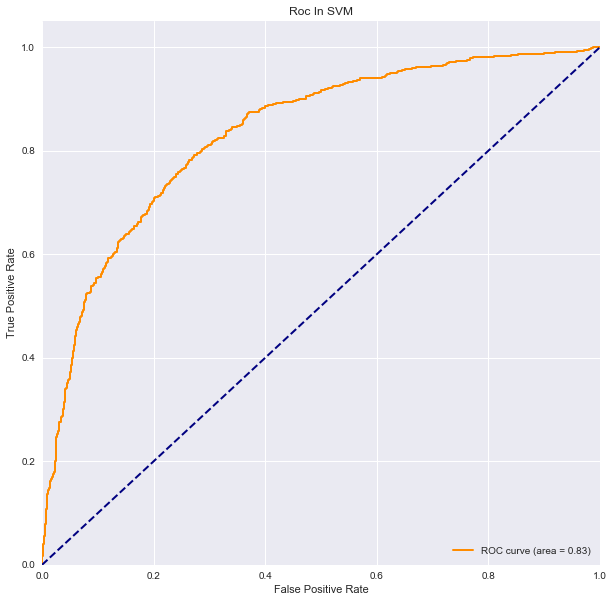

In [130]:
#支持向量机SVM
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import roc_curve,auc,accuracy_score

random_state = np.random.RandomState(0)
Classifiers = SVC(kernel='linear', probability=True,random_state=random_state)
# Classifiers = GaussianNB()

Classifiers.fit(X_one_train,y_one_train)

y_one_pred=Classifiers.predict(X_one_test)

accuracy = accuracy_score(y_one_test,y_one_pred)
recall=recall_score(y_one_test,y_one_pred)
precision=precision_score(y_one_test,y_one_pred)
f1_value = f1_score(y_one_test,y_one_pred)

print("准确率:",accuracy)
print("----------------------")
print("混淆矩阵:\n",confusion_matrix(y_one_test,y_one_pred))
print("---------------------")
print("召回率:",recall)
print("----------------------")
print("精确率:",precision)
print("---------------------")
print("F1值:",f1_value)
print("---------------------")

#通过decision_function()方法计算预测结果为正样本的概率
y_one_score = Classifiers.decision_function(X_one_test)
#计算不同阈值下的fpr和tpr
fpr,tpr,threshold = roc_curve(y_one_test, y_one_score)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc In SVM')
plt.legend(loc="lower right")
plt.show()


# 随机划分的结果
# 混淆矩阵:
#  [[1394  161]
#  [ 259  296]]
# ---------------------
# 召回率: 0.5333333333333333
# ----------------------
# 精确率: 0.6477024070021882
# ---------------------
# F1值: 0.5849802371541503
# ---------------------

# 分层抽样
# 混淆矩阵:
#  [[1395  154]
#  [ 250  311]]
# ---------------------
# 召回率: 0.5543672014260249
# ----------------------
# 精确率: 0.6688172043010753
# ---------------------
# F1值: 0.6062378167641326
# ---------------------
